# Degree Two Model of co2 emission

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf=df[["CYLINDERS","FUELCONSUMPTION_COMB","ENGINESIZE","CO2EMISSIONS"]]
cdf.head()

,CYLINDERS,FUELCONSUMPTION_COMB,ENGINESIZE,CO2EMISSIONS
0,4,8.5,2.0,196
1,4,9.6,2.4,221
2,4,5.9,1.5,136
3,6,11.1,3.5,255
4,6,10.6,3.5,244


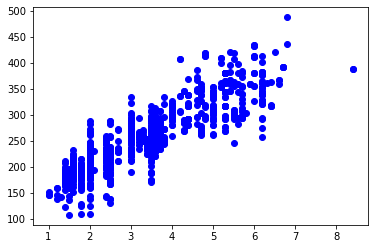

In [4]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="blue")
plt.show()

In [6]:
#train test
msk=np.random.rand(len(df))<0.8

train=cdf[msk]
test=cdf[~msk]

In [8]:
trainx=train[["ENGINESIZE"]]
trainy=train[["CO2EMISSIONS"]]

testx=test[["ENGINESIZE"]]
testy=test[["CO2EMISSIONS"]]

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
poly_train_x=poly.fit_transform(trainx)

# TRAINING

In [16]:
#as polynimial regression is atype of linear regression using linear regression regression to fit the model
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(poly_train_x,trainy)
print("coefficient:",regr.coef_)
print("Intercept:",regr.intercept_)

coefficient: [[ 0.         50.63288346 -1.51000201]]
Intercept: [107.15073853]


# plotting

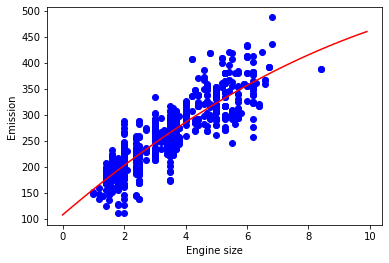

In [17]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
xx=np.arange(0.0,10.0,0.1) #setting up label of x axis
yy=regr.intercept_[0]+regr.coef_[0][1]*xx+regr.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,"-r")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Testing

In [19]:
#in testinng you will first fit transform the input then predict
poly_x=poly.fit_transform(testx)
test_y_hat=regr.predict(poly_x)

print("Mean Absolute Error:%.2f"%np.mean(np.absolute(test_y_hat-testy)))
print("Residual Sum Of Squares:%.2f"%np.mean((test_y_hat-testy)**2))

from sklearn.metrics import r2_score
print("Accuracy:%.2f"%r2_score(testy,test_y_hat))

Mean Absolute Error:22.34
Residual Sum Of Squares:879.43
Accuracy:0.76


# PREDICTING

In [20]:
new=[[4]] #engine size
poly_new=poly.fit_transform(new) #fitting the iinter to the polynomial regression
regr.predict(poly_new)

array([[285.52224016]])